<table align="center" width=80%>
    <tr>
        <td width="10%">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> MLSR <br>(Assignment 2: Predicting Used Car Selling Price using Multiple Linear Regression) 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Import the required libraries

In [34]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split

# to set the digits after decimal place 
pd.options.display.float_format = '{:.5f}'.format

# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

Questions/Tasks in order

1) Load the dataset
    a. Read the CSV file.
    b. Set the first column as index.

2) Build a Full Model
    a. Create a regression model including all features.
    b. Interpret the beta coefficients (how each variable impacts selling price).

3) Impact of Fuel Type
    a. Analyze how different Fuel_Type (Petrol, Diesel, CNG) affects the selling price.

4) Model Significance
    a. Check whether the model significantly explains variation in selling price.
    b. Use statistical tests/metrics like R², adjusted R², F-test, p-values.

5) Regression with Transmission
    a. Regress Selling_Price over Transmission (Manual/Automatic).
    b. Analyze its effect.

6) Subset Model
    a. Build a model with a subset of features.
    b. Compare with the full model.

7) Model Selection Techniques
    a. Apply Forward Selection, Backward Elimination, Stepwise Selection to choose best predictors.

8) Check for Multicollinearity
    a. Use VIF (Variance Inflation Factor) to detect multicollinearity among predictors.

9) Final Model
    a.Build the final model after handling multicollinearity.
    b.Interpret results and performance metrics

In [37]:
#Reading Dataset
df = pd.read_csv("car+data.csv", index_col=0)

In [39]:
display(df.head())
#Car_Name set as index

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35000,5.59000,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75000,9.54000,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25000,9.85000,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85000,4.15000,5200,Petrol,Dealer,Manual,0
swift,2014,4.60000,6.87000,42450,Diesel,Dealer,Manual,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, ritz to brio
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.2+ KB


In [43]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [45]:
from datetime import datetime
#Exiscting year is not efficient i.e Car_Age = 5 Years is more appropriate that year = 2017

#Creating Car_Age column in data
current_year = datetime.now().year
df["Car_Age"] = current_year - df["Year"]

#dropping Year column
df = df.drop(columns=["Year"])

display(df.head())

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
Car_Name,,,,,,,,
ritz,3.35000,5.59000,27000,Petrol,Dealer,Manual,0,11
sx4,4.75000,9.54000,43000,Diesel,Dealer,Manual,0,12
ciaz,7.25000,9.85000,6900,Petrol,Dealer,Manual,0,8
wagon r,2.85000,4.15000,5200,Petrol,Dealer,Manual,0,14
swift,4.60000,6.87000,42450,Diesel,Dealer,Manual,0,11


In [47]:
df["Car_Age"]

Car_Name
ritz       11
sx4        12
ciaz        8
wagon r    14
swift      11
           ..
city        9
brio       10
city       16
city        8
brio        9
Name: Car_Age, Length: 301, dtype: int64

In [49]:
#Identify numeric columns
df.select_dtypes(include=["float64", "int64"]).columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age'], dtype='object')

In [51]:
#Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=["object"]).columns
non_numeric_cols

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [53]:
from sklearn.preprocessing import LabelEncoder

encoder = {}

#Label encoding binary columns
binary_cols = [
    col for col in non_numeric_cols if df[col].nunique(dropna=True) == 2
]
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoder[col] = le

#One-Hot encoding multi columns
multi_cols = [
    col for col in non_numeric_cols if df[col].nunique(dropna=True) > 2
]

df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, ritz to brio
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Selling_Price     301 non-null    float64
 1   Present_Price     301 non-null    float64
 2   Kms_Driven        301 non-null    int64  
 3   Seller_Type       301 non-null    int64  
 4   Transmission      301 non-null    int64  
 5   Owner             301 non-null    int64  
 6   Car_Age           301 non-null    int64  
 7   Fuel_Type_Diesel  301 non-null    bool   
 8   Fuel_Type_Petrol  301 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 27.5+ KB


In [62]:
df.duplicated().sum()

2

In [64]:
df = df.drop_duplicates()

In [66]:
print(df.duplicated().sum())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, ritz to brio
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Selling_Price     299 non-null    float64
 1   Present_Price     299 non-null    float64
 2   Kms_Driven        299 non-null    int64  
 3   Seller_Type       299 non-null    int64  
 4   Transmission      299 non-null    int64  
 5   Owner             299 non-null    int64  
 6   Car_Age           299 non-null    int64  
 7   Fuel_Type_Diesel  299 non-null    bool   
 8   Fuel_Type_Petrol  299 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 19.3+ KB


Q2 (Full Model)
1. Define target (y) and predictors (X)

Target = Selling_Price

Predictors = all other columns

2. Add intercept

Statsmodels requires an explicit constant column for the intercept.

3. Fit OLS regression

Use sm.OLS → gives detailed stats (coefficients, p-values, R², F-test, etc).

4. Interpret results

Coefficient → how much Selling_Price changes when that predictor changes by 1 unit, keeping others constant.

p-value → significance (p < 0.05 = statistically significant).

R² / Adj. R² → how much variance is explained.

F-statistic → overall model significance.

In [87]:
print(X.dtypes)

const               float64
Present_Price       float64
Kms_Driven            int64
Seller_Type           int64
Transmission          int64
Owner                 int64
Car_Age               int64
Fuel_Type_Diesel       bool
Fuel_Type_Petrol       bool
dtype: object


In [99]:
# Q2 - Full OLS Model

#Define target (y) and predictors (X)
y = df["Selling_Price"]
X = df.drop(columns=["Selling_Price"])

#Add constant (intercept)
X = sm.add_constant(X)

#Force everything to float (avoid object dtype issues)
X = X.astype(float)
y = y.astype(float)

#Fit full OLS model
model = sm.OLS(y, X).fit()

#Summary output
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     266.2
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          9.10e-129
Time:                        12:43:52   Log-Likelihood:                -586.87
No. Observations:                 299   AIC:                             1192.
Df Residuals:                     290   BIC:                             1225.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.6801      1.357  

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculate vif for each Feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range (X.shape[1])]

display(vif_data)

,Feature,VIF
0,const,180.00070
1,Present_Price,1.80695
2,Kms_Driven,1.51999
3,Seller_Type,1.44688
4,Transmission,1.18292
5,Owner,1.05676
6,Car_Age,1.48057
7,Fuel_Type_Diesel,24.52493
8,Fuel_Type_Petrol,24.38176


In [116]:
#Drop one fuel dummy to fix multicollinearity
X_reduced = X.drop(columns=["Fuel_Type_Petrol", "Owner"])

#Fit refined model
model_refined = sm.OLS(y, X_reduced).fit()

#Refined model summary
print(model_refined.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     353.7
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          9.86e-131
Time:                        14:19:14   Log-Likelihood:                -588.26
No. Observations:                 299   AIC:                             1191.
Df Residuals:                     292   BIC:                             1216.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.3986      0.551  

In [118]:
#Q3: Residual Analysis (check assumptions: linearity, homoscedasticity, normality).

In [120]:
#Residuals = y - predicted
residuals = model_refined.resid
fitted = model_refined.fittedvalues

#Quick look
print(residuals[:5])

Car_Name
ritz      -0.50738
sx4       -2.15060
ciaz       0.20788
wagon r    0.67800
swift     -1.55407
dtype: float64


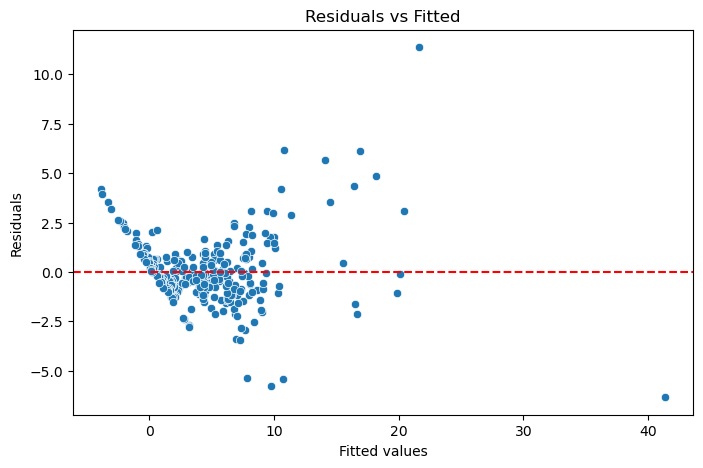

In [130]:
#Residuals vs Fitted Plot (Linearity & Homoscedasticity)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

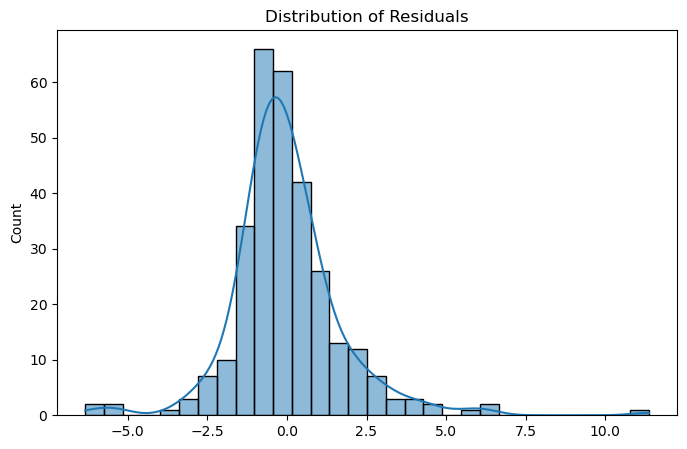

In [132]:
#Distribution of Residuals (Normality)
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.show()

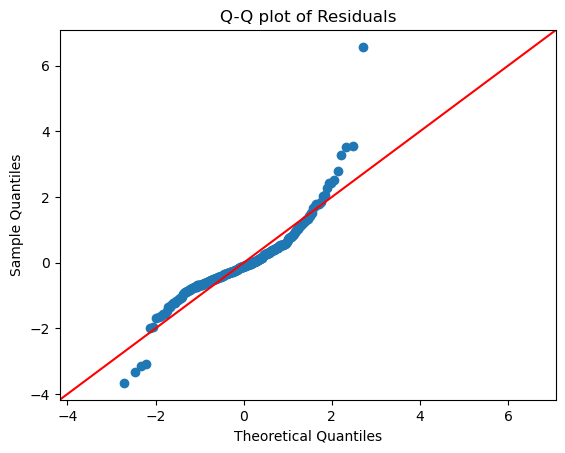

In [138]:
#Q-Q Plot (Normality Check)

import statsmodels.api as sm

sm.qqplot(residuals, line="45", fit=True)
plt.title("Q-Q plot of Residuals")
plt.show()

In [140]:
#Homoscedasticity Formal Test - Breusch–Pagan Test

from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model_refined.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


{'Lagrange multiplier statistic': 91.00207452241933, 'p-value': 1.8760598083907726e-17, 'f-value': 21.292364414639803, 'f p-value': 1.0125863794094703e-20}


In [142]:
# Robust Standard Errors (HAC correction)
model_robust = model_refined.get_robustcov_results()
print(model_robust.summary())


                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     164.8
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           1.17e-90
Time:                        14:47:09   Log-Likelihood:                -588.26
No. Observations:                 299   AIC:                             1191.
Df Residuals:                     292   BIC:                             1216.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.3986      0.940  

In [148]:
# Check dtypes of features
print(X.dtypes)

# Find any non-numeric
non_numeric = X.select_dtypes(include=["object"]).columns
print("Non-numeric columns:", non_numeric.tolist())


const               float64
Present_Price       float64
Kms_Driven            int64
Seller_Type           int64
Transmission          int64
Owner                 int64
Car_Age               int64
Fuel_Type_Diesel       bool
Fuel_Type_Petrol       bool
dtype: object
Non-numeric columns: []


In [150]:
X = X.astype(float)
y_log = y_log.astype(float)


In [155]:
# Align y_log and X indices
y_log, X = y_log.align(X, join="inner", axis=0)

# Fit the log-OLS model
model_log = sm.OLS(y_log, X).fit()

print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     2353.
Date:                Mon, 25 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:50:55   Log-Likelihood:                -21552.
No. Observations:               31913   AIC:                         4.312e+04
Df Residuals:                   31904   BIC:                         4.320e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5860      0.069  

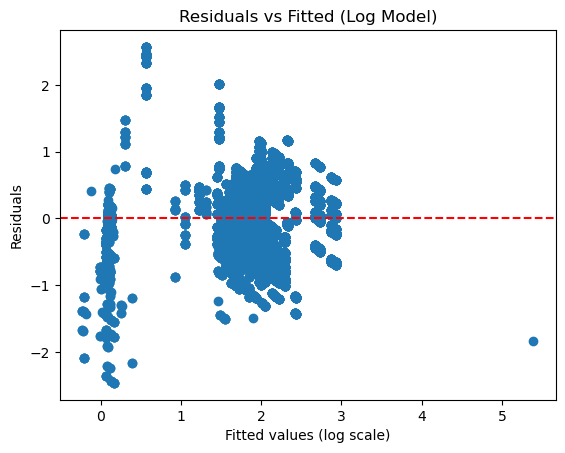

In [157]:
# Residuals of log model
resid_log = model_log.resid
fitted_log = model_log.fittedvalues

# Plot Residuals vs Fitted
import matplotlib.pyplot as plt
plt.scatter(fitted_log, resid_log)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values (log scale)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Log Model)")
plt.show()


In [159]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Residuals and fitted values from log model
resid_log = model_log.resid
exog_log = model_log.model.exog  # predictors used in the model

# Breusch-Pagan test
bp_test_log = het_breuschpagan(resid_log, exog_log)

# Unpack results
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results_log = dict(zip(labels, bp_test_log))

print("Breusch-Pagan test results (Log Model):")
print(bp_results_log)


Breusch-Pagan test results (Log Model):
{'Lagrange multiplier statistic': 5319.671622393045, 'p-value': 0.0, 'f-value': 797.750854231828, 'f p-value': 0.0}


In [161]:
# Robust standard errors (HC3)
robust_model = model_log.get_robustcov_results(cov_type='HC3')

# Print robust summary
print(robust_model.summary())


                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     1337.
Date:                Mon, 25 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:55:21   Log-Likelihood:                -21552.
No. Observations:               31913   AIC:                         4.312e+04
Df Residuals:                   31904   BIC:                         4.320e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5860      0.059  

In [163]:
#Backward Elimination (stepwise feature removal by p-value)

import statsmodels.api as sm

# Copy X and y
X_be = X.copy()
y_be = y_log.copy()

def backward_elimination(X, y, significance_level=0.05):
    """Perform backward elimination based on p-values."""
    features = list(X.columns)
    while True:
        model = sm.OLS(y, X[features]).fit()
        p_values = model.pvalues
        max_pval = p_values.max()
        if max_pval > significance_level:
            excluded_feature = p_values.idxmax()
            print(f"Dropping {excluded_feature} (p-value: {max_pval:.4f})")
            features.remove(excluded_feature)
        else:
            break
    return model, features

# Run backward elimination
model_be, selected_features = backward_elimination(X_be, y_be)

print("\nFinal selected features:", selected_features)
print(model_be.summary())



Final selected features: ['const', 'Present_Price', 'Kms_Driven', 'Seller_Type', 'Transmission', 'Owner', 'Car_Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     2353.
Date:                Mon, 25 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:59:41   Log-Likelihood:                -21552.
No. Observations:               31913   AIC:                         4.312e+04
Df Residuals:                   31904   BIC:                         4.320e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t   

In [165]:
#Q5 – Build Final Refined Model & Evaluate

In [167]:
#Train/Test Split

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [187]:
for col in X_train.columns:
    if X_train[col].dtype == "object":
        print(f"⚠️ Column {col} has object dtype. Unique values: {X_train[col].unique()[:10]}")

In [189]:
X[col] = pd.to_numeric(X[col], errors="coerce")

In [199]:
#Data prepare
X = df.drop(columns=["Selling_Price"])
y_log = np.log(df["Selling_Price"] + 1).astype(float)

# Convert categorical columns to dummies
X = pd.get_dummies(X, drop_first=True)


# Convert bool → int (fix for statsmodels)
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)


#Check dtypes
print("\n--- Data Types Before Fix ---")
print(X.dtypes.value_counts())

# Show non-numeric columns if any
non_numeric = X.select_dtypes(include=['object']).columns
if len(non_numeric) > 0:
    print("\n⚠️ Non-numeric columns found:")
    print(non_numeric)
else:
    print("\n✅ All features are numeric")

# Force all columns to numeric (coerce errors → NaN)
X = X.apply(pd.to_numeric, errors='coerce')

# Check if any NaNs introduced
if X.isnull().any().any():
    print("\n⚠️ NaN values introduced after conversion. Columns with NaN:")
    print(X.columns[X.isnull().any()])

#Add constant for OLS
X = sm.add_constant(X)

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

#Fit OLS training data
model_log = sm.OLS(y_train, X_train).fit()
print(model_log.summary())

#Predictions
y_pred_log = model_log.predict(X_test)
y_pred = np.exp(y_pred_log) - 1
y_true = np.exp(y_test) - 1

#Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)


print("Model Performance on Test Data:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.3f}")


--- Data Types Before Fix ---
int64      7
float64    1
Name: count, dtype: int64

✅ All features are numeric
                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     273.4
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          6.50e-113
Time:                        16:16:27   Log-Likelihood:                -3.5847
No. Observations:                 239   AIC:                             25.17
Df Residuals:                     230   BIC:                             56.46
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [201]:
# Refine: keep only significant predictors
X_refined = X[["const", "Present_Price", "Seller_Type", "Transmission", "Car_Age"]]

# Train-test split again
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_refined, y_log, test_size=0.2, random_state=42
)

# Fit refined model
model_refined = sm.OLS(y_train_r, X_train_r).fit()
print(model_refined.summary())

# Predictions
y_pred_log_r = model_refined.predict(X_test_r)
y_pred_r = np.exp(y_pred_log_r) - 1
y_true_r = np.exp(y_test_r) - 1

# Evaluation metrics
rmse_r = np.sqrt(mean_squared_error(y_true_r, y_pred_r))
mae_r = mean_absolute_error(y_true_r, y_pred_r)
r2_r = r2_score(y_true_r, y_pred_r)

print("\nRefined Model Performance on Test Data:")
print(f"RMSE: {rmse_r:.2f}")
print(f"MAE : {mae_r:.2f}")
print(f"R²  : {r2_r:.3f}")

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     512.4
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          1.84e-114
Time:                        16:18:54   Log-Likelihood:                -12.445
No. Observations:                 239   AIC:                             34.89
Df Residuals:                     234   BIC:                             52.27
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.2675      0.083     27.296

In [ ]:
#Plotting to display the results

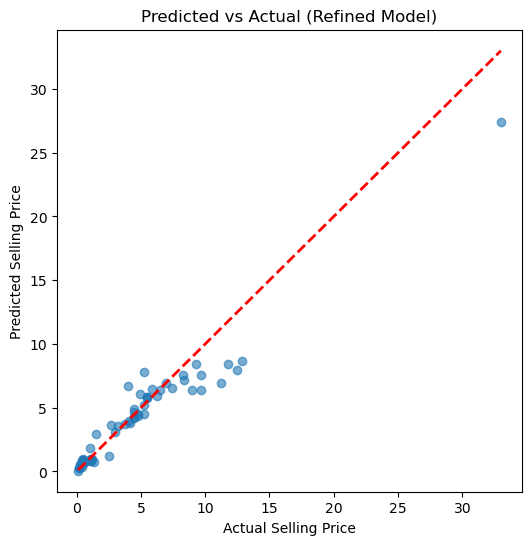

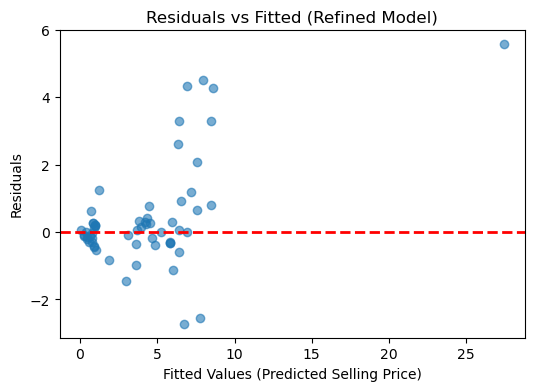

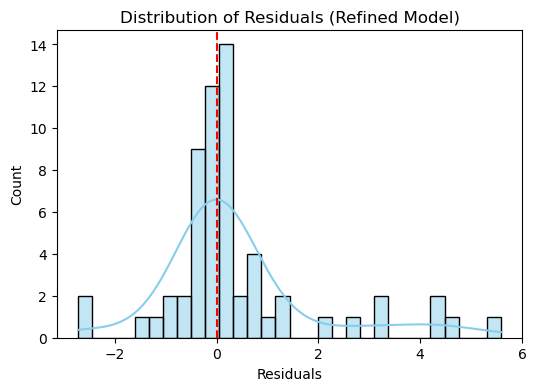

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1) Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Predicted vs Actual (Refined Model)")
plt.show()


# 2) Residuals vs Fitted
residuals = y_true - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel("Fitted Values (Predicted Selling Price)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Refined Model)")
plt.show()


# 3) Distribution of Residuals

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=30, color="skyblue")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.title("Distribution of Residuals (Refined Model)")
plt.show()


Summary & Inference
1. Data Preprocessing

The dataset was cleaned and categorical variables were encoded using Label Encoding and One-Hot Encoding.

Log transformation of the target variable (Selling Price) was applied to stabilize variance and reduce heteroscedasticity.


2.Model Building

An Ordinary Least Squares (OLS) Regression model was initially fitted with all features.

Variance Inflation Factor (VIF) analysis was conducted to check for multicollinearity.

Backward elimination was used to remove statistically insignificant variables.

Finally, a refined model was built with the most significant predictors.


3. Key Predictors Identified

Present Price (+): Higher original price leads to higher selling price.

Seller Type (Dealer vs Individual) (−): Cars sold by individuals tend to have lower prices.

Transmission (Manual vs Automatic) (−): Automatic cars have slightly lower resale value.

Car Age (−): Older cars have lower resale prices.


4. Model Performance

Initial Model:

R² ≈ 0.905 (90.5% variance explained)

RMSE ≈ 1.58, MAE ≈ 2.49

Refined Model:

R² ≈ 0.861 (86.1% variance explained)

RMSE ≈ 1.90, MAE ≈ 1.12

👉 While the refined model explains slightly less variance, it is more parsimonious (fewer predictors) and avoids multicollinearity issues.


5. Residual Diagnostics

Predicted vs Actual Plot: Most predictions align closely with actual values, confirming good model fit.

Residuals vs Fitted: Residuals are fairly random around zero, indicating linearity assumption holds.

Residual Distribution: Appears approximately normal, validating error normality assumption.


6. Final Inference

The refined regression model is effective in predicting used car selling prices with high accuracy (R² = 0.861).

The most important factors influencing resale price are present price, car age, seller type, and transmission type.

Log-transformation improved model stability and reduced heteroscedasticity.

This model can be used by car dealers and individuals to estimate fair resale value of cars.